## Investment Case Study
# ------------------------

## CheckPoint 1-Data Cleaning 1

In [1]:
#making necessary imports
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

### Import data from CSVs into DataFrame

In [2]:
#Creating DataFrames from CSVs
companies = pd.read_csv('companies.txt', sep ='\t', encoding='latin1') 
rounds2 = pd.read_csv('rounds2.csv', encoding='latin1')

# Removing the special characters in Permalink & company_permalink column.
companies['permalink']=companies[['permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
rounds2['company_permalink']=rounds2[['company_permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))

### For Table 1.1 - Understand the data set

In [3]:
#Finding unique companies in rounds2

#convert company_permalink to lower case to avoid same value being counted twice due to case difference
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
print(rounds2['company_permalink'].nunique())

66368


In [4]:
#Finding unique companies in comapnies.txt
companies['permalink'] = companies['permalink'].str.lower()
print(companies['permalink'].nunique())

66368


In [5]:
#find companies in rounds2 not in companies
print(companies.loc[~rounds2.company_permalink.isin(companies.permalink)])

Empty DataFrame
Columns: [permalink, name, homepage_url, category_list, status, country_code, state_code, region, city, founded_at]
Index: []


In [6]:
#Merge dataframes rounds2 & companies
master_frame = pd.merge(rounds2, companies, left_on='company_permalink', right_on='permalink',how='left')
master_frame.shape


(114949, 16)

## CheckPoint 2 -- Funding Type Analysis

### Cleaning master_frame DF

In [7]:
#Checking NaN values in master_frame
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [8]:
#Removing rows with NaN for raised_amount_usd. This will affect the model stats
master_frame = master_frame[~master_frame.raised_amount_usd.isna()]

In [9]:
#Checking master_frame for NaN in raised_amount_usd after the cleaning
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         66790
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                4332
category_list               1044
status                         0
country_code                5851
state_code                  7604
region                      7048
city                        7045
founded_at                 15966
dtype: int64

### Extracting data from master_fame for funding type in Angel, Seed, Private_Equity, Venture

In [10]:
master_frame_for_preferred_type = master_frame[master_frame.funding_round_type.isin(['angel','private_equity','venture','seed'])]

In [11]:
#Calculating mean investment per funding_round_type
round(master_frame_for_preferred_type.groupby(['funding_round_type']).mean()/1000000, 2)

,raised_amount_usd
funding_round_type,
angel,0.96
private_equity,73.31
seed,0.72
venture,11.75


#### Venture type investment seems most suitable for SPARK funds for an investment between 5-15mn per round

In [12]:
#Filtering Data from master_frame for 'Venture' type 
master_frame_venture = master_frame[master_frame.funding_round_type == 'venture']

## CheckPoints-- Part 2

### CheckPoint 3-- Country Analysis

In [13]:
#Creating DataFrame with top9 most invested countries in funding_round_type='venture'

#Filtering out rows with country_code = 'NaN'
master_frame_venture.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         22185
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           0
homepage_url                2608
category_list                502
status                         0
country_code                2117
state_code                  2861
region                      2713
city                        2713
founded_at                  9631
dtype: int64

In [14]:
master_frame_venture = master_frame_venture[~master_frame_venture.country_code.isna()]

In [15]:
#Checking master_frame_venture for NaN after data cleaning
master_frame_venture.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         21294
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           0
homepage_url                2175
category_list                302
status                         0
country_code                   0
state_code                   744
region                       596
city                         596
founded_at                  8551
dtype: int64

In [16]:
#Finding top9 countries
top9_country_list = master_frame_venture.groupby('country_code')['raised_amount_usd'].sum().nlargest(9).index##/1000000
print(top9_country_list.values)

['USA' 'CHN' 'GBR' 'IND' 'CAN' 'FRA' 'ISR' 'DEU' 'JPN']


In [17]:
#Creating top9 DataFrame
top9 = master_frame_venture[master_frame_venture.country_code.isin(top9_country_list.values)]
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


### CheckPoint4 -- Sector Analysis

In [18]:
#CheckPoint 4-- read mapping.csv

sectors = pd.read_csv('mapping.csv')


In [19]:
#Preparing sectors DataFrame for merge

#Massaging the category_list to display correct categories e.g A0lytics - Analytics
sectors['category_list'] = sectors['category_list'].str.replace('0', 'na', regex=True)
sectors.head(25)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [20]:
#Creating category_list and primary_sector mapping
sectors_category_primary_map = pd.melt(sectors, id_vars=['category_list'], value_vars=['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])

sectors_category_primary_map.head()

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0


In [21]:
#Creating category_list and primary_sector mapping

#select rows where 'value' =1 
sectors_category_primary_map = sectors_category_primary_map[sectors_category_primary_map['value']!= 0]

In [22]:
#renaming melts column as main_sector and primary_sec
#sectors_category_primary_map.rename(columns={'variable':'main_sector','category_list':'primary_sec'})
sectors_category_primary_map = sectors_category_primary_map.drop('value', axis=1)
sectors_category_primary_map = sectors_category_primary_map.rename(columns={'category_list':'primary_sec', 'variable':'main_sector'})

In [23]:
#Create data frame with top3 most invested English-speaking countries in funding_type = 'venture'
top3_english_countries_venture = top9[top9.country_code.isin(['USA','GBR','IND'])]
top3_english_countries_venture.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012


In [24]:
#Preparing master_frame "top3_english_countries_venture" for merge with sector_map

#Fetching primary sector for companies from 'category_list'
top3_english_countries_venture[['primary_sec','other_sec']] = top3_english_countries_venture['category_list'].str.split("|",1,expand=True)

In [25]:
top3_english_countries_venture.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'permalink',
       'name', 'homepage_url', 'category_list', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_at', 'primary_sec',
       'other_sec'],
      dtype='object')

In [26]:
top3_english_countries_venture = top3_english_countries_venture.drop('other_sec', axis=1)

In [27]:
#merging DataFrame with each primary_sec mapped to main sector
top3_with_sectors = pd.merge(top3_english_countries_venture,sectors_category_primary_map, on='primary_sec', how='inner')

In [28]:
top3_with_sectors.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sec,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment


In [29]:
#Entries in the merged dataframe with NaN in category_list are mapped to 'Blanks' as per mapping.csv
top3_with_sectors[top3_with_sectors.main_sector == 'Blanks']

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sec,main_sector
26702,/organization/3pl-central,/funding-round/895e7a284b35bdf86103e52db8a630a6,venture,NaN,03-12-2015,17500000.0,/organization/3pl-central,3PL Central,http://3plcentral.com/,NaN,operating,USA,CA,Los Angeles,Manhattan Beach,01-01-2006,NaN,Blanks
26703,/organization/60frames-entertainment,/funding-round/60daf91c26dd8f3bd8cbb7d9c28ba9b6,venture,A,02-08-2007,3500000.0,/organization/60frames-entertainment,60Frames Entertainment,http://60frames.com/,NaN,closed,USA,CA,Los Angeles,Beverly Hills,NaN,NaN,Blanks
26704,/organization/accelerator-corp,/funding-round/215f281607a54b9d5fc848b5c74ef9e7,venture,NaN,22-05-2003,15000000.0,/organization/accelerator-corp,Accelerator Corp.,http://www.acceleratorcorp.com,NaN,operating,USA,WA,Seattle,Seattle,01-01-2003,NaN,Blanks
26705,/organization/accelerator-corp,/funding-round/bdca470b4ae21074297ad9da55e11dbf,venture,C,03-08-2007,22500000.0,/organization/accelerator-corp,Accelerator Corp.,http://www.acceleratorcorp.com,NaN,operating,USA,WA,Seattle,Seattle,01-01-2003,NaN,Blanks
26706,/organization/accelerator-corp,/funding-round/d1341bc6df5065519b7b399ac9a67823,venture,NaN,19-11-2004,11800000.0,/organization/accelerator-corp,Accelerator Corp.,http://www.acceleratorcorp.com,NaN,operating,USA,WA,Seattle,Seattle,01-01-2003,NaN,Blanks
26707,/organization/adam-aircraft,/funding-round/c61f38e059ed4b94744658f07eb6efb7,venture,NaN,21-06-2007,105000000.0,/organization/adam-aircraft,Adam Aircraft,http://www.adamaircraft.com/,NaN,closed,USA,CO,Denver,Englewood,01-01-1998,NaN,Blanks
26708,/organization/adaptive-media-3,/funding-round/62fe3848f9a2f28888cac0889f18f38f,venture,NaN,13-10-1999,15000000.0,/organization/adaptive-media-3,Adaptive Media,http://www.adaptivemedia.com/,NaN,operating,USA,CA,SF Bay Area,Sunnyvale,01-01-1999,NaN,Blanks
26709,/organization/alphaserv-com,/funding-round/9a938f76a7d7213cda4e65e0554c0b8b,venture,NaN,24-11-1999,5000000.0,/organization/alphaserv-com,AlphaServ.com,http://www.alphaserv.com/,NaN,closed,USA,CA,"Orange County, California",Santa Ana,NaN,NaN,Blanks
26710,/organization/altela,/funding-round/b081fcbfc3ed22619250798744d259f1,venture,A,22-10-2007,7100000.0,/organization/altela,Altela,http://altelainc.com/,NaN,operating,USA,NM,Albuquerque,Albuquerque,NaN,NaN,Blanks
26711,/organization/angle-plc,/funding-round/f68b06a2272bca94ac57452247684164,venture,NaN,27-03-2015,250000.0,/organization/angle-plc,ANGLE plc,http://www.angleplc.com,NaN,operating,GBR,N7,NaN,NaN,01-01-1994,NaN,Blanks



### CheckPoint-5-- Sector Analysis 2

In [30]:
#Cleaning the merged DataFrame. Dropping rows with 'Blanks' as main_sector
top3_with_sectors = top3_with_sectors[top3_with_sectors.main_sector != "Blanks"]


In [31]:
#Removing rows where funding is not in the range 5-15 mn USD
top3_with_sectors = top3_with_sectors[(top3_with_sectors['raised_amount_usd']/1000000 >= 5) &( top3_with_sectors['raised_amount_usd']/1000000 <=15)]
top3_with_sectors.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sec,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment


### Creating DataFrames D1, D2, D3 for country-wise analysis
### with 'count_of_investments' and 'sum_of_investments' for each main_sector

In [32]:
#Creating DataFrame for USA
D1 = top3_with_sectors[top3_with_sectors['country_code']== 'USA']
D1['count_of_investments']=D1.groupby('main_sector').main_sector.transform('count')
D1['sum_of_investments']=D1.groupby('main_sector').raised_amount_usd.transform('sum')/1000000
D1.head()


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sec,main_sector,count_of_investments,sum_of_investments
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment,591,5099.197982
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment,591,5099.197982
20,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,591,5099.197982
21,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,591,5099.197982
25,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,/organization/matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,Media,Entertainment,591,5099.197982


In [33]:
#Creating Dataframe GBR
D2 = top3_with_sectors[top3_with_sectors['country_code']== 'GBR']
D2['count_of_investments']=D2.groupby('main_sector').main_sector.transform('count')
D2['sum_of_investments']=D2.groupby('main_sector').raised_amount_usd.transform('sum')/1000000
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sec,main_sector,count_of_investments,sum_of_investments
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,56,482.784687
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,56,482.784687
91,/organization/aihit,/funding-round/40cb08117155daba3aa7ad8b81b41068,venture,A,07-10-2011,5500000.0,/organization/aihit,aiHit,http://aihit.com,Analytics|Artificial Intelligence|Business Int...,acquired,GBR,N7,Staines-upon-thames,Staines-upon-thames,01-01-2007,Analytics,"Social, Finance, Analytics, Advertising",133,1089.404014
219,/organization/brandwatch,/funding-round/09f7932220728f0083982db2fced0518,venture,NaN,15-03-2012,6000000.0,/organization/brandwatch,Brandwatch,http://www.brandwatch.com,Analytics|Social Media,operating,GBR,E2,London,Brighton,01-10-2007,Analytics,"Social, Finance, Analytics, Advertising",133,1089.404014
435,/organization/digital-shadows,/funding-round/ca618cebbc7e8ada0921af25e9955166,venture,A,11-02-2015,8000000.0,/organization/digital-shadows,Digital Shadows,http://www.digitalshadows.com,Analytics|Cyber Security|Financial Services|In...,operating,GBR,H9,London,London,01-05-2011,Analytics,"Social, Finance, Analytics, Advertising",133,1089.404014


In [34]:
#Creating dataframe for IND
D3 = top3_with_sectors[top3_with_sectors['country_code']== 'IND']
D3['count_of_investments']=D3.groupby('main_sector').main_sector.transform('count')
D3['sum_of_investments']=D3.groupby('main_sector').raised_amount_usd.transform('sum')/1000000
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sec,main_sector,count_of_investments,sum_of_investments
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment,33,280.83000
454,/organization/eka-software-solutions,/funding-round/2bbd8112aa5429fdf92f13fcb4254f71,venture,NaN,01-01-2005,6000000.0,/organization/eka-software-solutions,Eka Software Solutions,http://www.ekaplus.com,Analytics|Logistics|Software|Storage|Supply Ch...,operating,IND,19,Bangalore,Bangalore,01-01-2004,Analytics,"Social, Finance, Analytics, Advertising",60,550.54955
455,/organization/eka-software-solutions,/funding-round/7b4c0d627c52b378a7c2b5c2edb10c26,venture,NaN,01-01-2009,10000000.0,/organization/eka-software-solutions,Eka Software Solutions,http://www.ekaplus.com,Analytics|Logistics|Software|Storage|Supply Ch...,operating,IND,19,Bangalore,Bangalore,01-01-2004,Analytics,"Social, Finance, Analytics, Advertising",60,550.54955
723,/organization/loginext-solutions,/funding-round/ae317438267472aa73cb1ac43e66a525,venture,A,22-09-2015,10000000.0,/organization/loginext-solutions,LogiNext Solutions,http://loginextsolutions.com,Analytics|Big Data Analytics|Data Visualizatio...,operating,IND,16,Mumbai,Mumbai,07-10-2014,Analytics,"Social, Finance, Analytics, Advertising",60,550.54955
741,/organization/manthan-systems,/funding-round/34b5d3d2bbd104d20d1a62a27220739f,venture,A,01-03-2007,5700000.0,/organization/manthan-systems,Manthan Systems,http://www.manthansystems.com,Analytics|Big Data Analytics|Business Intellig...,operating,IND,19,Bangalore,Bangalore,01-01-2003,Analytics,"Social, Finance, Analytics, Advertising",60,550.54955


#### Table 5.1- Total number of investments/country('USA','GBR','IND')

In [35]:
len(D1)

12012

In [36]:
len(D2)

619

In [37]:
len(D3)

328

#### Table 5.1-Total amount of investment(USD)

In [38]:
#Total amount of investment
print(D1['raised_amount_usd'].sum()/1000000)
print(D2['raised_amount_usd'].sum()/1000000)
print(D3['raised_amount_usd'].sum()/1000000)

107318.294664
5365.2283
2949.543602


#### Table 5.1- Finding top3 sectors based on count of investments for each 'USA','GBR','IND'

In [39]:
D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
Name: main_sector, dtype: int64

In [40]:
D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
Name: main_sector, dtype: int64

In [41]:
D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Name: main_sector, dtype: int64

#### Table 5.1 -- Company which received highest investment in top-sector count-wise

In [42]:
D1[D1.main_sector == 'Others'].sort_values(by='raised_amount_usd', ascending=False).head(1).name 

14738    Monetate
Name: name, dtype: object

In [43]:
D2[D2.main_sector == 'Others'].sort_values(by='raised_amount_usd', ascending=False).head(1).name

35071    SilverRail Technologies
Name: name, dtype: object

In [44]:
D3[D3.main_sector == 'Others'].sort_values(by='raised_amount_usd', ascending=False).head(1).name

26327    Tejas Networks India
Name: name, dtype: object

#### Table 5.1 -- Company which received highest investment in the second-best sector count-wise

In [45]:
D1[D1.main_sector == 'Social, Finance, Analytics, Advertising'].sort_values(by='raised_amount_usd', ascending=False).head(1).name

16234    Three Stage Media
Name: name, dtype: object

In [46]:
D2[D2.main_sector == 'Social, Finance, Analytics, Advertising'].sort_values(by='raised_amount_usd', ascending=False).head(1).name

29196    myThings
Name: name, dtype: object

In [47]:
D3[D3.main_sector == 'Social, Finance, Analytics, Advertising'].sort_values(by='raised_amount_usd', ascending=False).head(1).name

22222    Shiram Credit
Name: name, dtype: object

#### -----------------------------------Plots----------------------------------------------------------------------------------
## Checkpoint 6-- Plots 6.1
#### A plot showing the fraction of total investments (globally) in venture, seed, and private equity, 
#### and the average amount of investment in each funding type. 
#### This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [48]:
total_investments = master_frame_for_preferred_type.raised_amount_usd.sum()/1000000
pie_chart_entries = master_frame_for_preferred_type.groupby(by='funding_round_type').raised_amount_usd.sum()/(total_investments*1000000)*100


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.pie(pie_chart_entries, labels=pie_chart_entries.index, autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.show()

#plotting average investment/per funding type
avg_investment_per_type = master_frame_for_preferred_type.groupby('funding_round_type').raised_amount_usd.mean()/1000000

plt.figure(figsize=(10,5))
plt.bar(avg_investment_per_type.index, avg_investment_per_type)
plt.xlabel('Funding_type', fontsize=10)
plt.ylabel('Avg_Investment(in million USD)', fontsize=10)
plt.xticks(avg_investment_per_type.index, avg_investment_per_type.index, fontsize=10)#, rotation=30)
for index,value in enumerate(avg_investment_per_type):
    plt.text(index, value, str(round(value,2)))
plt.show()


<Figure size 640x480 with 1 Axes>

<Figure size 1000x500 with 1 Axes>



#### Plot 6.2
#### As per the pie-chart we see that the maximum number of investments occur in FT=venture. Also as per the bar graph we can see
#### avg amount per investment in Venture falls in the range of 5-15mn USD. Hence best suited for SPARK funds as per their stated requirement.

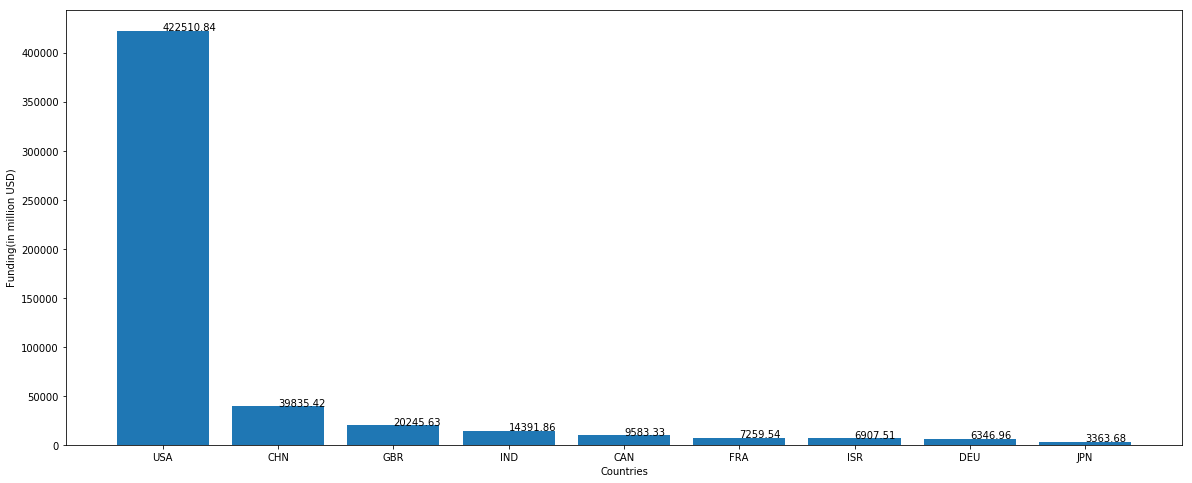

In [50]:
#Plot Showing the top 9 countries against the total amount of investments of funding type FT. 
#This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.
top9_funding_in_venture = top9.groupby('country_code').raised_amount_usd.sum()/1000000
top9_funding_in_venture.sort_values(axis=0, ascending=False, inplace=True)

plt.figure(figsize=(20,8))
plt.bar(top9_funding_in_venture.index, top9_funding_in_venture)
plt.xlabel('Countries', fontsize=10)
plt.ylabel('Funding(in million USD)', fontsize=10)
plt.xticks(top9_funding_in_venture.index, top9_funding_in_venture.index, fontsize=10)
for i, v in enumerate(top9_funding_in_venture):
    plt.text(i, v, str(round(v,2)))
plt.show()

#### Plot 6.3
#### #A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart 
#### (for the chosen investment type FT).

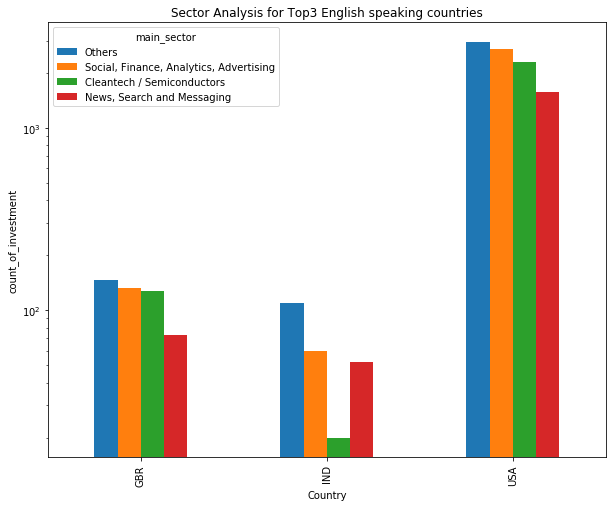

In [51]:
#A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart 
#(for the chosen investment type FT). 

df = top3_with_sectors['main_sector'].groupby(top3_with_sectors['country_code']).value_counts()

#Considering four categories for plot as top3 sectors for IND differ from those in USA,GBR
df_plot = df.loc[:,['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors','News, Search and Messaging']]
ax = df_plot.unstack().plot(kind='bar',figsize=(10,8),title="Sector Analysis for Top3 English speaking countries")
ax.set_ylabel("count_of_investment")
ax.set_xlabel("Country")
ax.set_yscale('log')

#### For 'USA' and 'GBR' top3 sectors are 'Others','Social,Finance,Analytics,Advertising','Cleantech/Semiconductors'
#### For 'IND' top 3 sectors count-wise  are 'Others','Social,Finance,Analytics,Advertising','News,Search and Messaging'